## Pancreatic Cancer Detection

<b>Background</b>
Pancreatic cancer is an extremely deadly type of cancer. Once diagnosed, the five-year survival rate is less than 10%. However, if pancreatic cancer is caught early, the odds of surviving are much better. Unfortunately, many cases of pancreatic cancer show no symptoms until the cancer has spread throughout the body. A diagnostic test to identify people with pancreatic cancer could be enormously helpful.

<b>Prediction task</b>
The goal in this dataset is predicting diagnosis, and more specifically, differentiating between 3 (pancreatic cancer) versus 2 (non-cancerous pancreas condition) and 1 (healthy). The dataset includes information on stage of pancreatic cancer, and diagnosis for non-cancerous patients, but remember—these won't be available to a predictive model. The goal, after all, is to predict the presence of disease before it's diagnosed, not after!

<b>Important note: </b> The columns “benign_sample_diagnosis” and “stage” should not be used for prediction, as the first column “benign_sample_diagnosis” is related to when the cancer is bening and the second to the stage of malignant cancer!

<b>Important note 2:</b> Since, there are three classes, class 3 (pancreatic cancer) versus class 2 (non-cancerous pancreas condition) and class 1 (healthy). I am going to make it a binary classification problem, where class 0 represents (classes 1 and 2) and class 1 represents (class 3).

### Importing Libraries

In [1]:
import numpy as np # For numerical computing
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from sklearn.model_selection import train_test_split # For data train test split
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Evaluation metrics

### Importing Data and Data Description

In [2]:
data = pd.read_csv("data/data.csv")
data_description = pd.read_csv("data/data-documentation-description.csv")

In [3]:
# Getting some rows from the data
data.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
# Getting the description of data
data_description

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, ..."
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ..."
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benig..."
6,stage,Stage,"For those with pancratic cancer, what stage wa..."
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnos..."
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal anti...
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


In [5]:
data.columns

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

In [6]:
data.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

## Data Preprocessing and Data Analysis

### Handling Missing Values

In [8]:
data.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [9]:
# Ratio of missing values
round(data.isna().sum()/len(data) * 100, 2)

sample_id                   0.00
patient_cohort              0.00
sample_origin               0.00
age                         0.00
sex                         0.00
diagnosis                   0.00
stage                      66.27
benign_sample_diagnosis    64.75
plasma_CA19_9              40.68
creatinine                  0.00
LYVE1                       0.00
REG1B                       0.00
TFF1                        0.00
REG1A                      48.14
dtype: float64

#### Column: REG1A

In [10]:
print(data_description.loc[ data_description['Column name'] == 'REG1A'].to_string())

   Column name Original column name                                                                                                                                                            Details
13       REG1A          REG1A ng/ml  Urinary levels of a protein that may be associated with pancreas regeneration. Only assessed in 306 patients (one goal of the study was to assess REG1B vs REG1A)


In [11]:
data.REG1A.value_counts()

0.000        7
137.000      2
64.821       2
1262.000     1
494.080      1
            ..
50.007       1
75.094       1
519.132      1
431.409      1
13200.000    1
Name: REG1A, Length: 298, dtype: int64

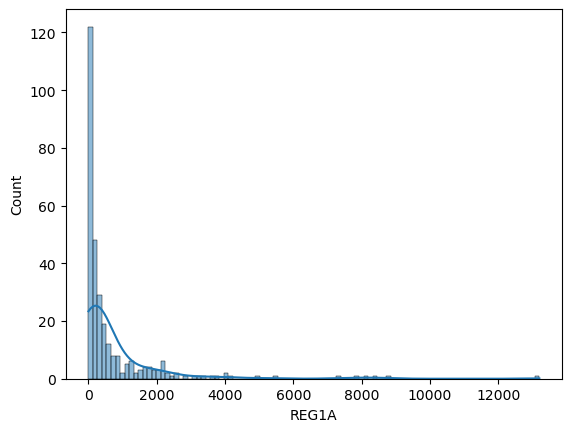

In [12]:
sns.histplot(data.REG1A, kde = True, bins = 100)
plt.show()

In [13]:
np.mean(data.REG1A), np.nanmedian(data.REG1A)

(735.2812222222221, 208.5385)

In [14]:
data.REG1A.value_counts()

0.000        7
137.000      2
64.821       2
1262.000     1
494.080      1
            ..
50.007       1
75.094       1
519.132      1
431.409      1
13200.000    1
Name: REG1A, Length: 298, dtype: int64

In [15]:
data['REG1A'].fillna(value = np.nanmedian(data['REG1A']), inplace=True)

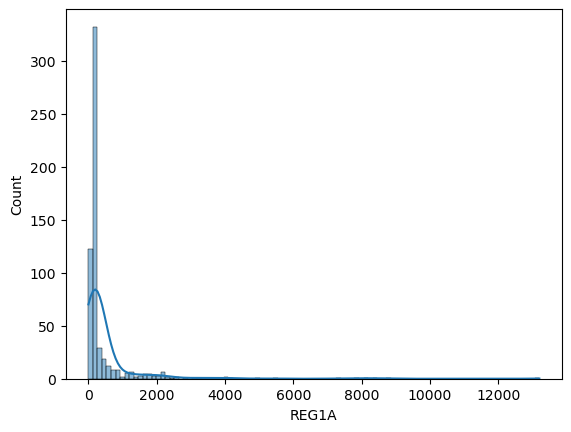

In [16]:
sns.histplot(data.REG1A, kde = True, bins = 100)
plt.show()

#### Column: plasma_CA19_9

In [17]:
print(data_description.loc[ data_description['Column name'] == 'plasma_CA19_9'].to_string())

     Column name Original column name                                                                                                                                                                                                                                                                         Details
8  plasma_CA19_9   Plasma CA19-9 U/ml  Blood plasma levels of CA 19–9 monoclonal antibody that is often elevated in patients with pancreatic cancer. Only assessed in 350 patients (one goal of the study was to compare various CA 19-9 cutpoints from a blood sample to the model developed using urinary samples).


In [18]:
data.plasma_CA19_9.value_counts()

11.0      8
9.0       8
7.0       6
10.0      5
4.0       5
         ..
263.0     1
1913.0    1
72.0      1
32.0      1
1488.0    1
Name: plasma_CA19_9, Length: 266, dtype: int64

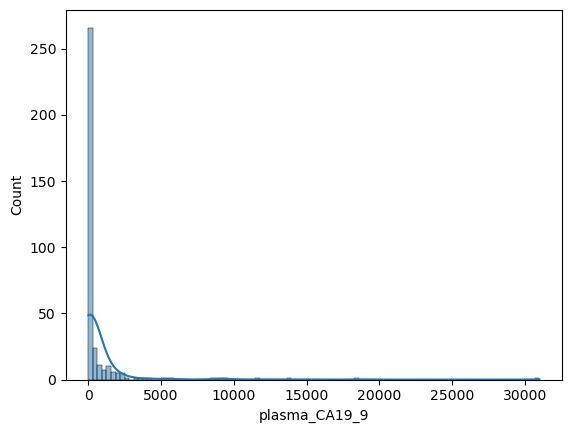

In [19]:
sns.histplot(data.plasma_CA19_9, kde = True, bins = 100)
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


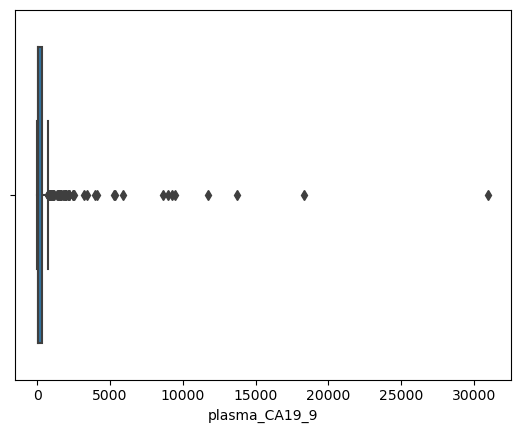

In [20]:
sns.boxplot(data.plasma_CA19_9)
plt.show()

In [21]:
np.mean(data.plasma_CA19_9), np.nanmedian(data.plasma_CA19_9) 

(654.0029437763428, 26.5)

In [22]:
data.plasma_CA19_9.value_counts()

11.0      8
9.0       8
7.0       6
10.0      5
4.0       5
         ..
263.0     1
1913.0    1
72.0      1
32.0      1
1488.0    1
Name: plasma_CA19_9, Length: 266, dtype: int64

In [23]:
data['plasma_CA19_9'].fillna(value = np.nanmedian(data['plasma_CA19_9']), inplace=True)

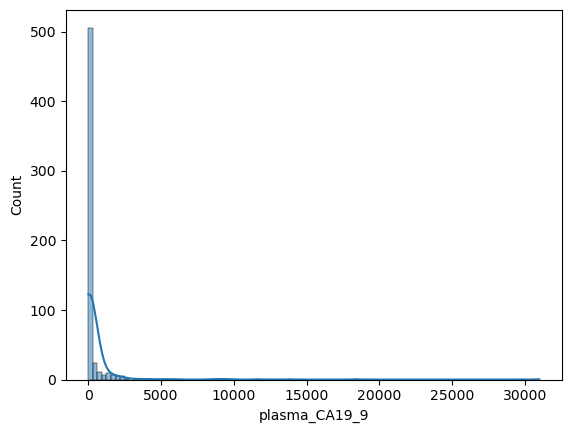

In [24]:
sns.histplot(data.plasma_CA19_9, kde = True, bins = 100)
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


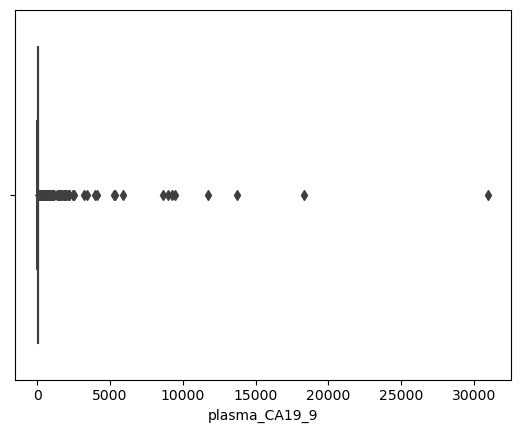

In [25]:
sns.boxplot(data.plasma_CA19_9)
plt.show()

In [26]:
data.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.0000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,26.5,0.97266,2.037585,94.46703,209.488250,228.4070
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,208.5385
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,208.5385
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,208.5385


In [27]:
data.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9                0
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64

#### Column: benign_sample_diagnosis

In [28]:
# print(data_description.loc[ data_description['Column name'] == 'benign_sample_diagnosis'].to_string())

In [29]:
data['benign_sample_diagnosis'].value_counts()

Pancreatitis                                                    41
Pancreatitis (Chronic)                                          35
Gallstones                                                      21
Pancreatitis (Alcohol-Chronic)                                  11
Cholecystitis                                                    9
Serous cystadenoma - NOS                                         7
Choledocholiathiasis                                             6
Abdominal Pain                                                   6
Pancreatitis (Idiopathic)                                        4
Pancreatitis (Alcohol-Chronic-Pseuodcyst)                        4
Pancreatitis (Gallstone)                                         4
Pancreatitis (Pseudocyst)                                        4
Premalignant lesions-Mucinous cystadenoma-NOS                    3
Pancreatitis (Autoimmune)                                        3
Serous microcystic adenoma                                    

In [30]:
data.loc[ (data.benign_sample_diagnosis.isna() == False) ]

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
183,S271,Cohort2,BPTB,32,F,2,NaN,Abdominal Pain,12.0,1.16493,5.417692,21.135,445.72500,208.5385
184,S299,Cohort2,BPTB,59,F,2,NaN,Abdominal Pain,26.5,0.41847,0.526248,24.111,4.09000,208.5385
185,S308,Cohort2,BPTB,65,F,2,NaN,Abdominal Pain,26.5,0.36192,2.343091,12.957,0.02823,208.5385
186,S314,Cohort2,BPTB,39,F,2,NaN,Abdominal Pain,26.5,0.89349,0.736352,21.550,105.94300,208.5385
187,S315,Cohort2,BPTB,65,F,2,NaN,Abdominal Pain,13.0,0.37323,0.228904,13.977,7.36700,208.5385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,S360,Cohort2,BPTB,49,F,2,NaN,Serous cystadenoma - NOS,20.0,0.71253,0.632433,22.602,494.58800,208.5385
387,S259,Cohort2,BPTB,53,F,2,NaN,Serous microcystic adenoma,21.0,0.45240,0.963804,21.320,78.29200,208.5385
388,S300,Cohort2,BPTB,74,F,2,NaN,Serous microcystic adenoma,13.0,0.12441,0.000498,1.295,42.66700,208.5385
389,S302,Cohort2,BPTB,69,M,2,NaN,Serous microcystic adenoma,26.5,0.13572,0.000543,19.427,2.57800,208.5385


In [31]:
data.loc[ (data.benign_sample_diagnosis.isna() == False), 'diagnosis'].value_counts()

2    208
Name: diagnosis, dtype: int64

#### Column: stage

In [32]:
print(data_description.loc[ data_description['Column name'] == 'stage'].to_string())

  Column name Original column name                                                                                Details
6       stage                Stage  For those with pancratic cancer, what stage was it? One of IA, IB, IIA, IIIB, III, IV


In [33]:
data.stage.value_counts()

III    76
IIB    68
IV     21
IB     12
IIA    11
II      7
IA      3
I       1
Name: stage, dtype: int64

In [34]:
data.loc[ (data.stage.isna() == False), 'diagnosis'].value_counts()

3    199
Name: diagnosis, dtype: int64

In [35]:
# We consider dropping these columns, since we are not going to use them!
data.drop(columns = ['benign_sample_diagnosis','stage'], inplace = True)

In [36]:
data.isna().sum()
# data.head()

sample_id         0
patient_cohort    0
sample_origin     0
age               0
sex               0
diagnosis         0
plasma_CA19_9     0
creatinine        0
LYVE1             0
REG1B             0
TFF1              0
REG1A             0
dtype: int64

In [37]:
# Dropping sample_id column, since we are not going to use for the prediction task
data.sample_id

0        S1
1       S10
2      S100
3      S101
4      S102
       ... 
585    S549
586    S558
587    S560
588    S583
589    S590
Name: sample_id, Length: 590, dtype: object

In [38]:
data.drop(columns = ['sample_id'], inplace=True)

In [39]:
data.head()

,patient_cohort,sample_origin,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,Cohort1,BPTB,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.0000
1,Cohort1,BPTB,81,F,1,26.5,0.97266,2.037585,94.46703,209.488250,228.4070
2,Cohort2,BPTB,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,208.5385
3,Cohort2,BPTB,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,208.5385
4,Cohort2,BPTB,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,208.5385


In [40]:
cleaned_file = "updated_data.csv"
data.to_csv(cleaned_file, index = True)
print("Data saved successfully to", cleaned_file)

Data saved successfully to updated_data.csv


### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [41]:
data.columns

Index(['patient_cohort', 'sample_origin', 'age', 'sex', 'diagnosis',
       'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

#### Column: patient_cohort

In [42]:
print(data_description.loc[ data_description['Column name'] == 'patient_cohort'].to_string())

      Column name Original column name                                                            Details
1  patient_cohort     Patient's Cohort  Cohort 1,  previously used samples; Cohort 2, newly added samples


In [43]:
data['patient_cohort'].value_counts()

Cohort1    332
Cohort2    258
Name: patient_cohort, dtype: int64

#### Column: sample_origin

In [44]:
print(data_description.loc[ data_description['Column name'] == 'sample_origin'].to_string())

     Column name Original column name                                                                                                                                                                       Details
2  sample_origin        Sample Origin  BPTB: Barts Pancreas Tissue Bank, London, UK; ESP: Spanish National Cancer Research Centre, Madrid, Spain; LIV: Liverpool University, UK; UCL: University College London, UK


In [45]:
data['sample_origin'].value_counts()

BPTB    409
LIV     132
ESP      29
UCL      20
Name: sample_origin, dtype: int64

In [46]:
# I do not think "sample_origin" colum would be usefull for predicting the output! Therefore, I am dropping it :)
data.drop(columns = ['sample_origin'], inplace=True)

#### Column: age

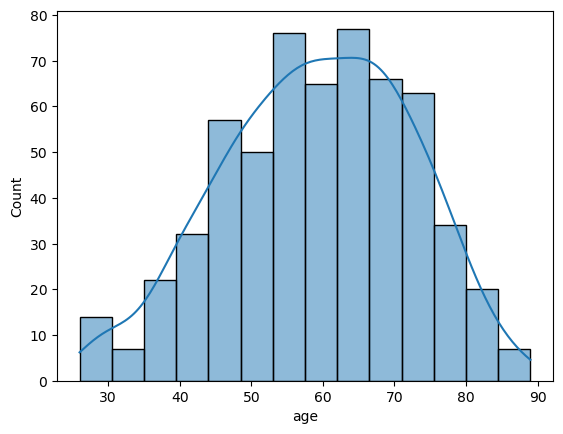

In [47]:
sns.histplot(data.age, kde = True)
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


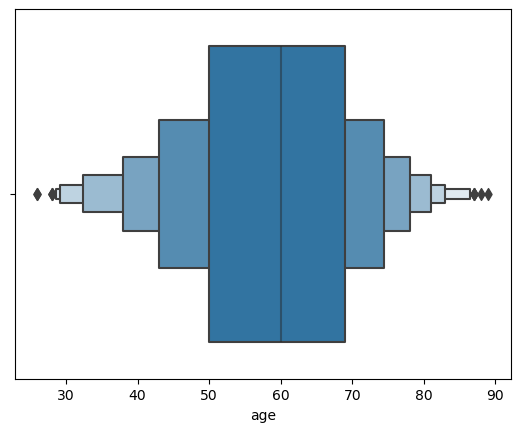

In [48]:
sns.boxenplot(data.age)
plt.show()

In [49]:
# checking is their any na value
hello = data.age.isna()
hello.value_counts()

False    590
Name: age, dtype: int64

#### Column: sex

In [50]:
data.sex.value_counts()

F    299
M    291
Name: sex, dtype: int64

#### Column: diagnosis

In [51]:
data.diagnosis.value_counts()

2    208
3    199
1    183
Name: diagnosis, dtype: int64

#### Column: plasma_CA19_9

In [52]:
data.plasma_CA19_9

0        11.7
1        26.5
2         7.0
3         8.0
4         9.0
        ...  
585      26.5
586      26.5
587      26.5
588      26.5
589    1488.0
Name: plasma_CA19_9, Length: 590, dtype: float64

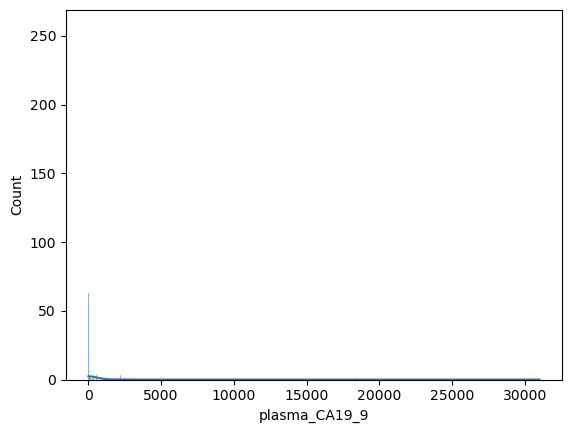

In [53]:
sns.histplot(data.plasma_CA19_9, kde = True)
plt.show()

In [54]:
data.plasma_CA19_9.value_counts()

26.5      240
9.0         8
11.0        8
7.0         6
4.0         5
         ... 
263.0       1
1913.0      1
72.0        1
32.0        1
1488.0      1
Name: plasma_CA19_9, Length: 267, dtype: int64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


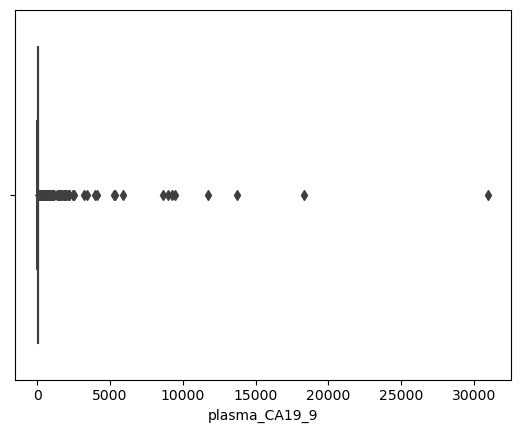

In [55]:
sns.boxplot(data.plasma_CA19_9)
plt.show()

#### Column: creatinine

In [56]:
data.creatinine

0      1.83222
1      0.97266
2      0.78039
3      0.70122
4      0.21489
        ...   
585    0.52026
586    0.85956
587    1.36851
588    1.33458
589    1.50423
Name: creatinine, Length: 590, dtype: float64

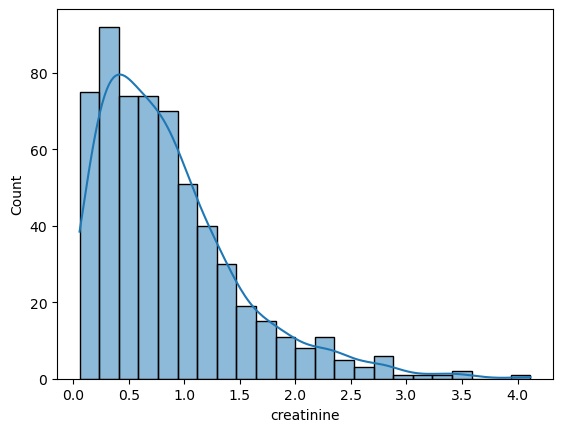

In [57]:
sns.histplot(data.creatinine, kde = True)
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


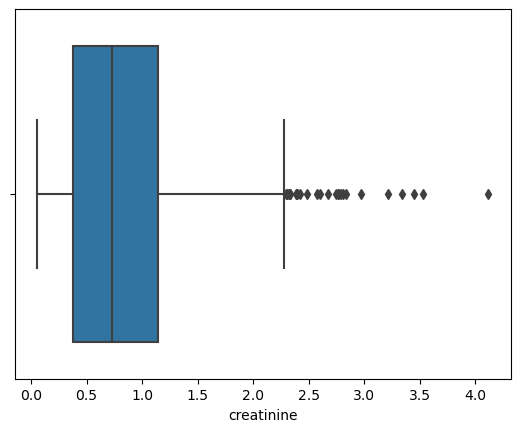

In [58]:
sns.boxplot(data.creatinine)
plt.show()

#### Columns: LYVE1, REG1B, TFF1, REG1A

In [59]:
data[['LYVE1', 'REG1B', 'TFF1','REG1A']]

,LYVE1,REG1B,TFF1,REG1A
0,0.893219,52.948840,654.282174,1262.0000
1,2.037585,94.467030,209.488250,228.4070
2,0.145589,102.366000,461.141000,208.5385
3,0.002805,60.579000,142.950000,208.5385
4,0.000860,65.540000,41.088000,208.5385
...,...,...,...,...
585,7.058209,156.241000,525.178000,208.5385
586,8.341207,16.915000,245.947000,208.5385
587,7.674707,289.701000,537.286000,208.5385
588,8.206777,205.930000,722.523000,208.5385


Histogram plot and Box plot:  LYVE1


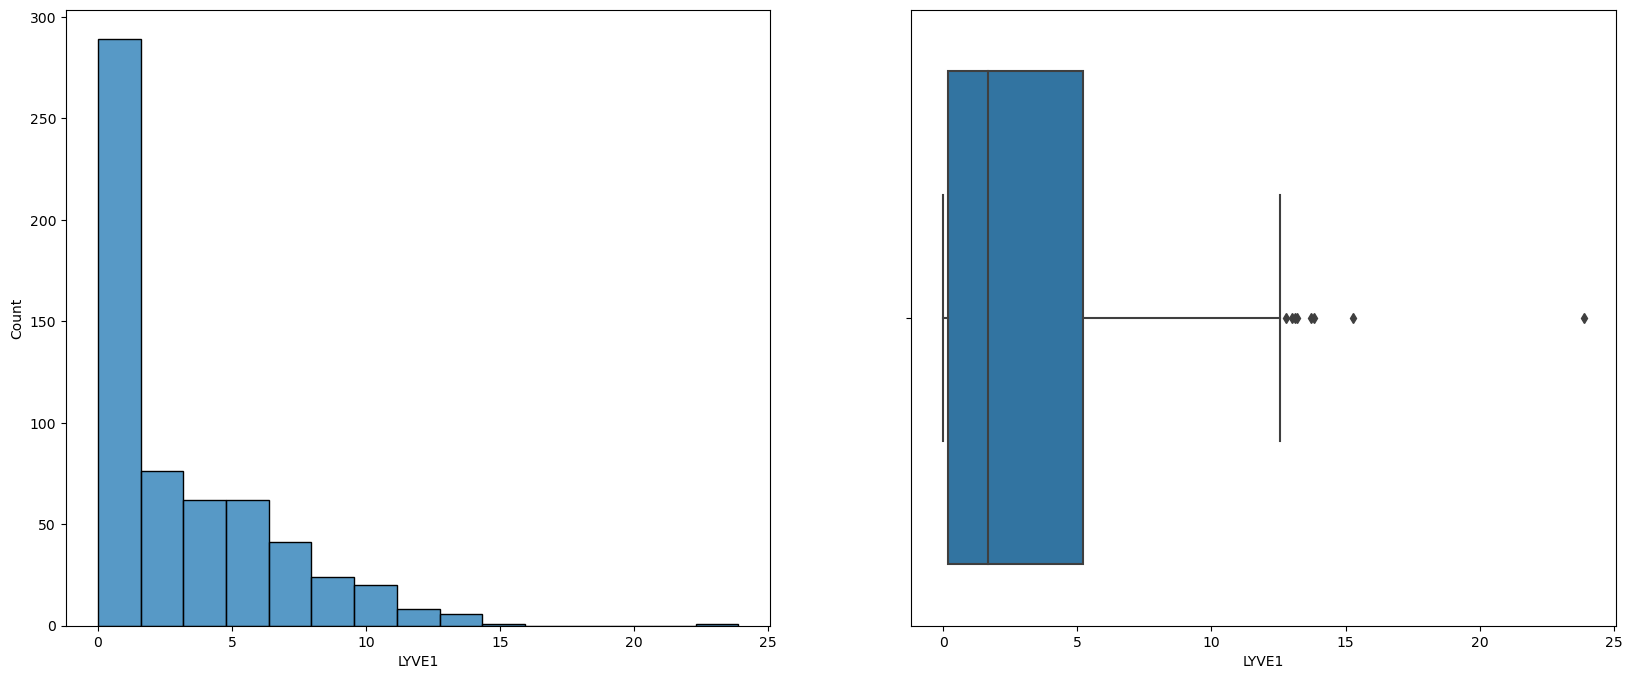

Histogram plot and Box plot:  REG1B


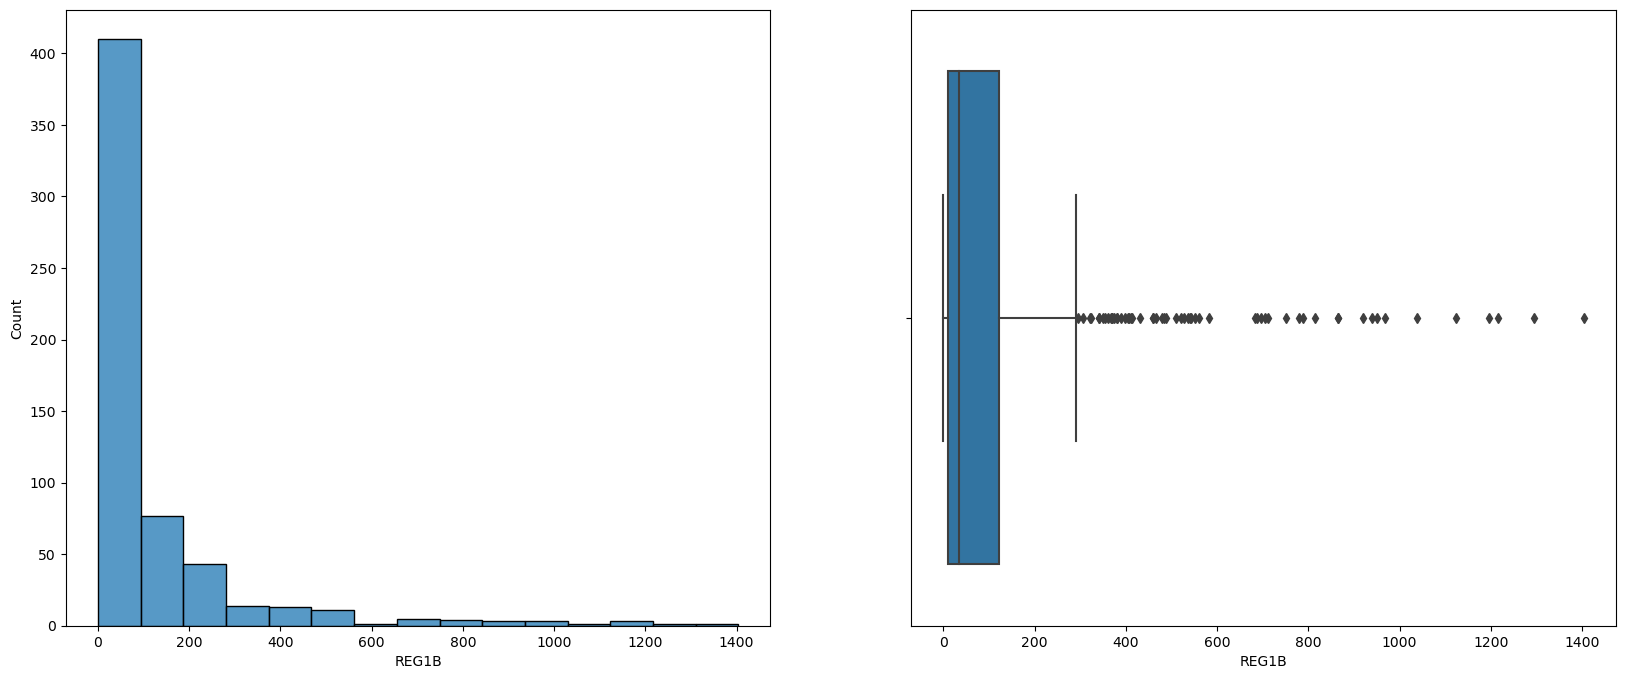

Histogram plot and Box plot:  TFF1


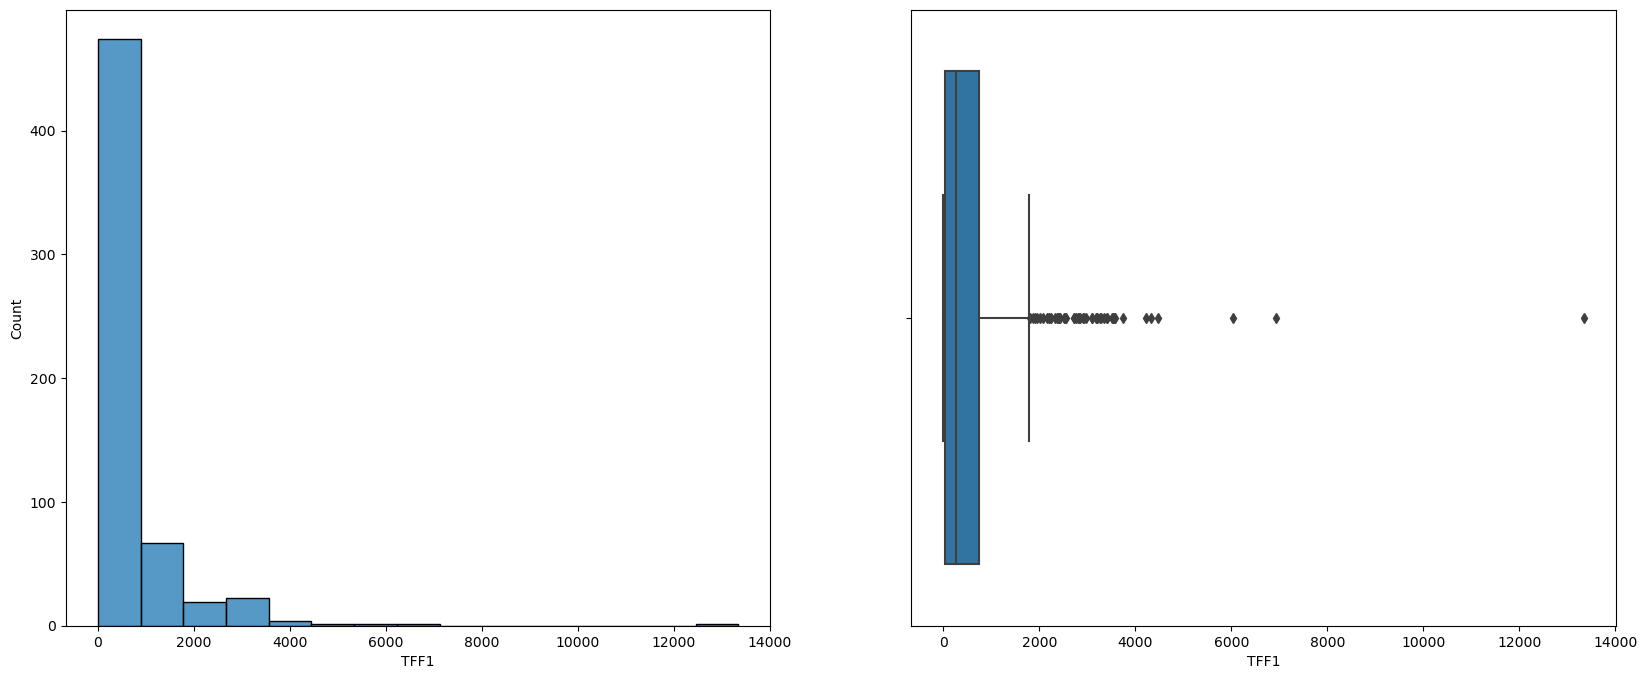

Histogram plot and Box plot:  REG1A


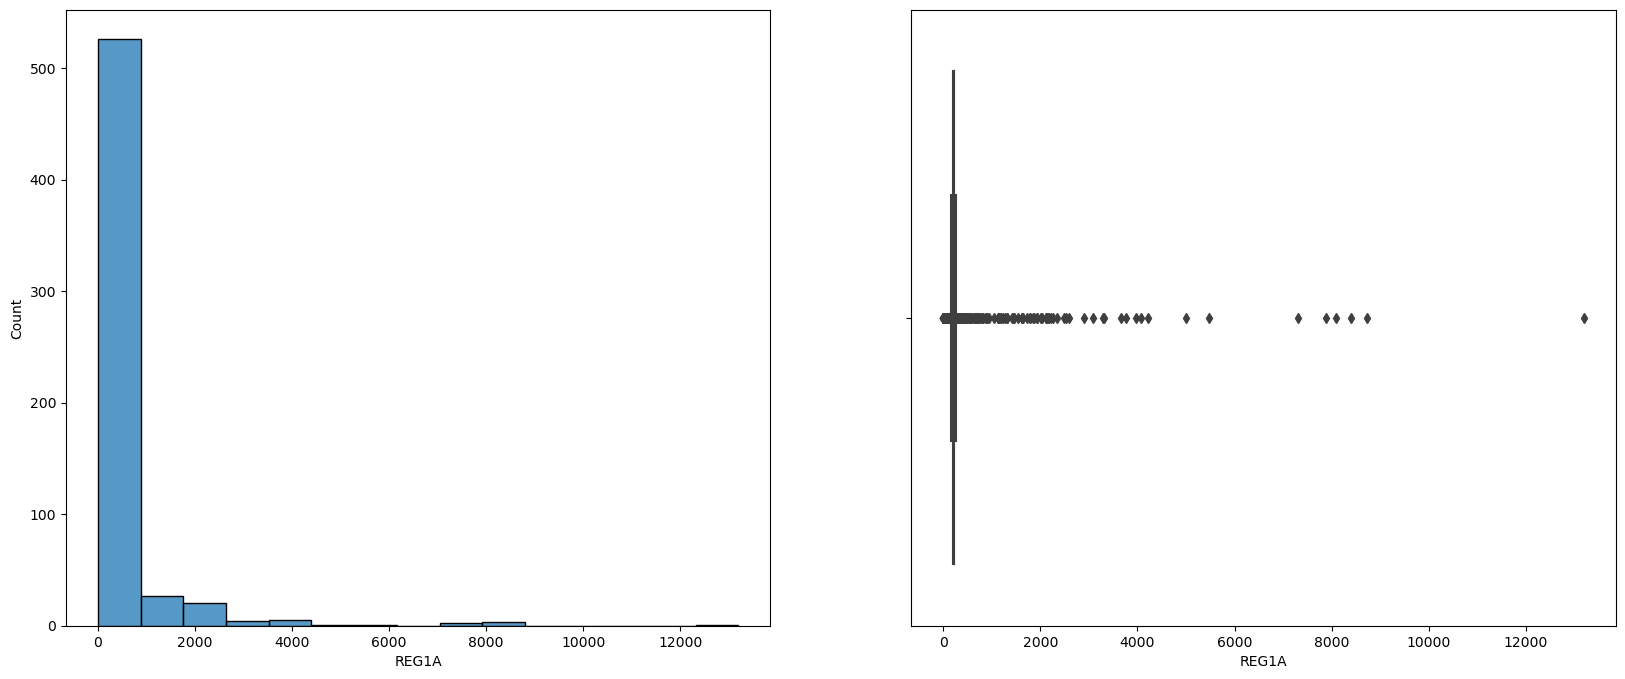

In [60]:
# A for loop to create histogram and boxplot plots for each of the remaining columns
for col in ['LYVE1', 'REG1B', 'TFF1','REG1A']:
    print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.histplot(data[col], ax=ax1, bins = 15)
    sns.boxplot(x = data[col], ax = ax2)
    plt.show()

### Bivariate Analysis

In [61]:
data.columns

Index(['patient_cohort', 'age', 'sex', 'diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

In [62]:
data.sample(5)

,patient_cohort,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
379,Cohort2,59,F,2,6.000000,0.33930,1.115925,21.7720,74.864000,208.5385
322,Cohort1,48,M,2,26.500000,1.30065,3.067997,459.0579,653.255000,5471.5930
8,Cohort2,59,F,1,26.500000,0.48633,0.001945,7.0210,26.782000,208.5385
182,Cohort2,76,F,1,8.000000,0.56550,0.002262,24.3170,62.488000,208.5385
52,Cohort2,63,F,1,2.059078,0.32799,0.001312,219.8605,0.025583,208.5385


In [63]:
categorical_cols = ['patient_cohort', 'sex', 'diagnosis']

In [64]:
numerical_cols = ['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

## Feature Engineering

#### Encoding Categorical Variables

In [65]:
data[categorical_cols]

,patient_cohort,sex,diagnosis
0,Cohort1,F,1
1,Cohort1,F,1
2,Cohort2,M,1
3,Cohort2,M,1
4,Cohort2,M,1
...,...,...,...
585,Cohort2,M,3
586,Cohort2,F,3
587,Cohort2,M,3
588,Cohort2,F,3


In [66]:
pd.get_dummies(data['patient_cohort'], drop_first=True)

,Cohort2
0,0
1,0
2,1
3,1
4,1
...,...
585,1
586,1
587,1
588,1


In [67]:
data['patient_cohort_1?'] = pd.get_dummies(data['patient_cohort'], drop_first=True, dtype='int')
data.drop(columns = ['patient_cohort'], inplace=True)

In [68]:
data.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.0000,0
1,81,F,1,26.5,0.97266,2.037585,94.46703,209.488250,228.4070,0
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,208.5385,1
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,208.5385,1
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,208.5385,1


In [69]:
pd.get_dummies(data['sex'], drop_first=True)

,M
0,0
1,0
2,1
3,1
4,1
...,...
585,1
586,0
587,1
588,0


In [70]:
data['is_male?'] = pd.get_dummies(data['sex'], drop_first=True, dtype = 'int')
data.drop(columns = ['sex'], inplace=True)

In [71]:
data.head()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
0,33,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.0000,0,0
1,81,1,26.5,0.97266,2.037585,94.46703,209.488250,228.4070,0,0
2,51,1,7.0,0.78039,0.145589,102.36600,461.141000,208.5385,1,1
3,61,1,8.0,0.70122,0.002805,60.57900,142.950000,208.5385,1,1
4,62,1,9.0,0.21489,0.000860,65.54000,41.088000,208.5385,1,1


### Feature Scaling and Transformation

From the EDA phase (univarite analysis), we can see that most of the numerical variables are skewed and have a lot of outliers. Therefore, I am applying log-transformation to these variables to "somehow" eliminate the skeweness and thus reduce the effect of outliers!

In [72]:
data[numerical_cols]

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,11.7,1.83222,0.893219,52.948840,654.282174,1262.0000
1,81,26.5,0.97266,2.037585,94.467030,209.488250,228.4070
2,51,7.0,0.78039,0.145589,102.366000,461.141000,208.5385
3,61,8.0,0.70122,0.002805,60.579000,142.950000,208.5385
4,62,9.0,0.21489,0.000860,65.540000,41.088000,208.5385
...,...,...,...,...,...,...,...
585,68,26.5,0.52026,7.058209,156.241000,525.178000,208.5385
586,71,26.5,0.85956,8.341207,16.915000,245.947000,208.5385
587,63,26.5,1.36851,7.674707,289.701000,537.286000,208.5385
588,75,26.5,1.33458,8.206777,205.930000,722.523000,208.5385


In [73]:
data[numerical_cols].describe()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,398.747509,0.855383,3.063530,111.774090,597.868722,481.730488
std,13.109520,1896.028213,0.639028,3.438796,196.267110,1010.477245,1095.179818
min,26.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,17.000000,0.373230,0.167179,10.757216,43.961000,195.201000
50%,60.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,41.750000,1.139482,5.205037,122.741013,742.736000,224.007000
max,89.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


Histogram plot and Box plot:  age


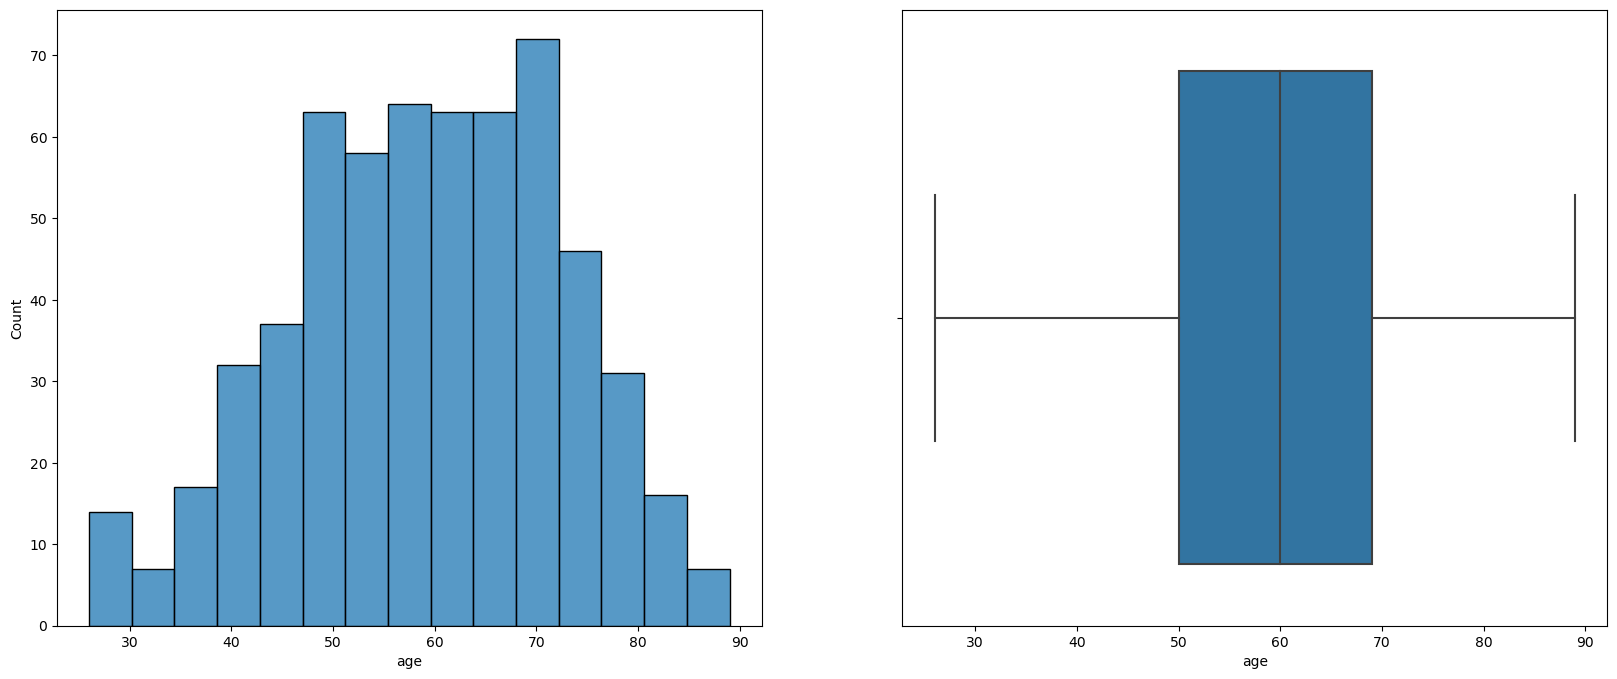

Histogram plot and Box plot:  plasma_CA19_9


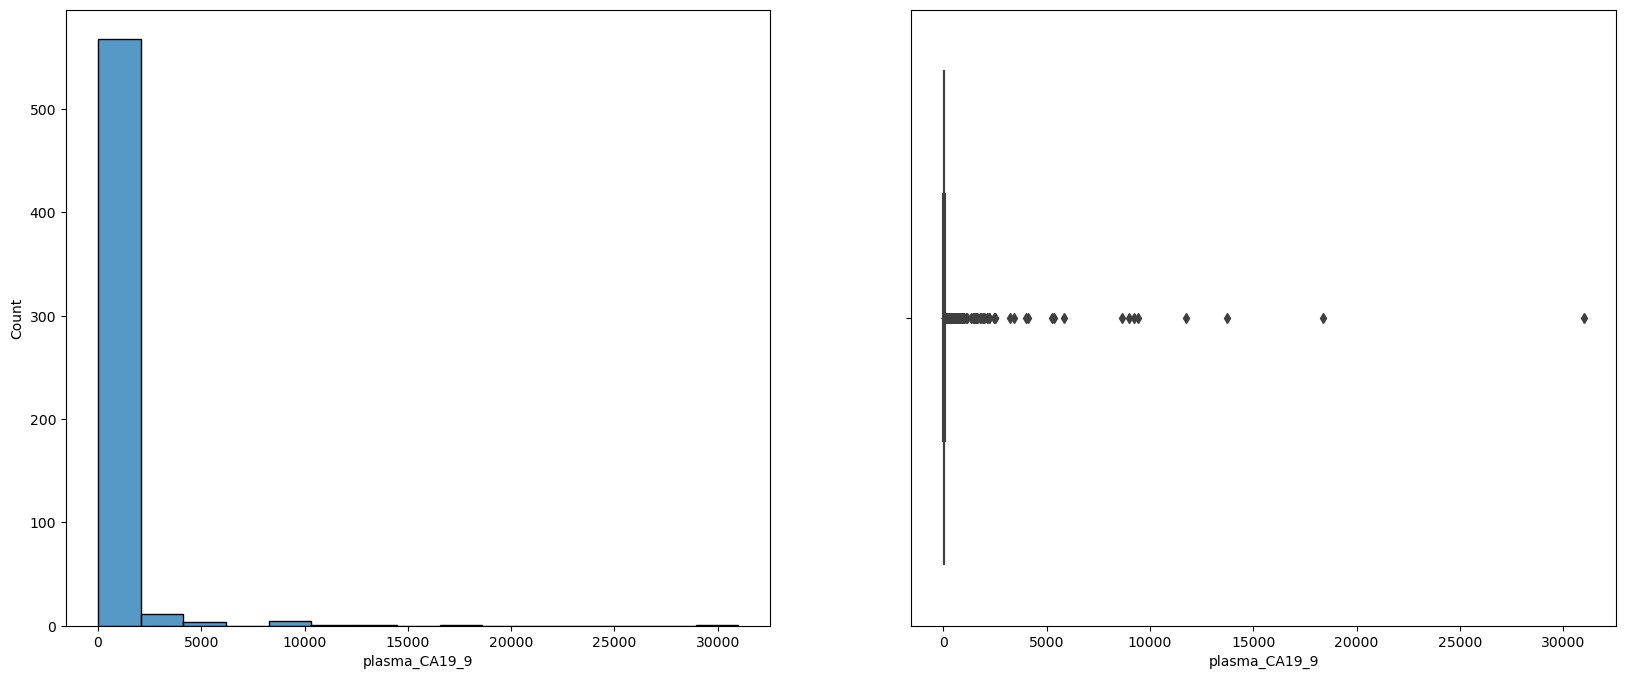

Histogram plot and Box plot:  creatinine


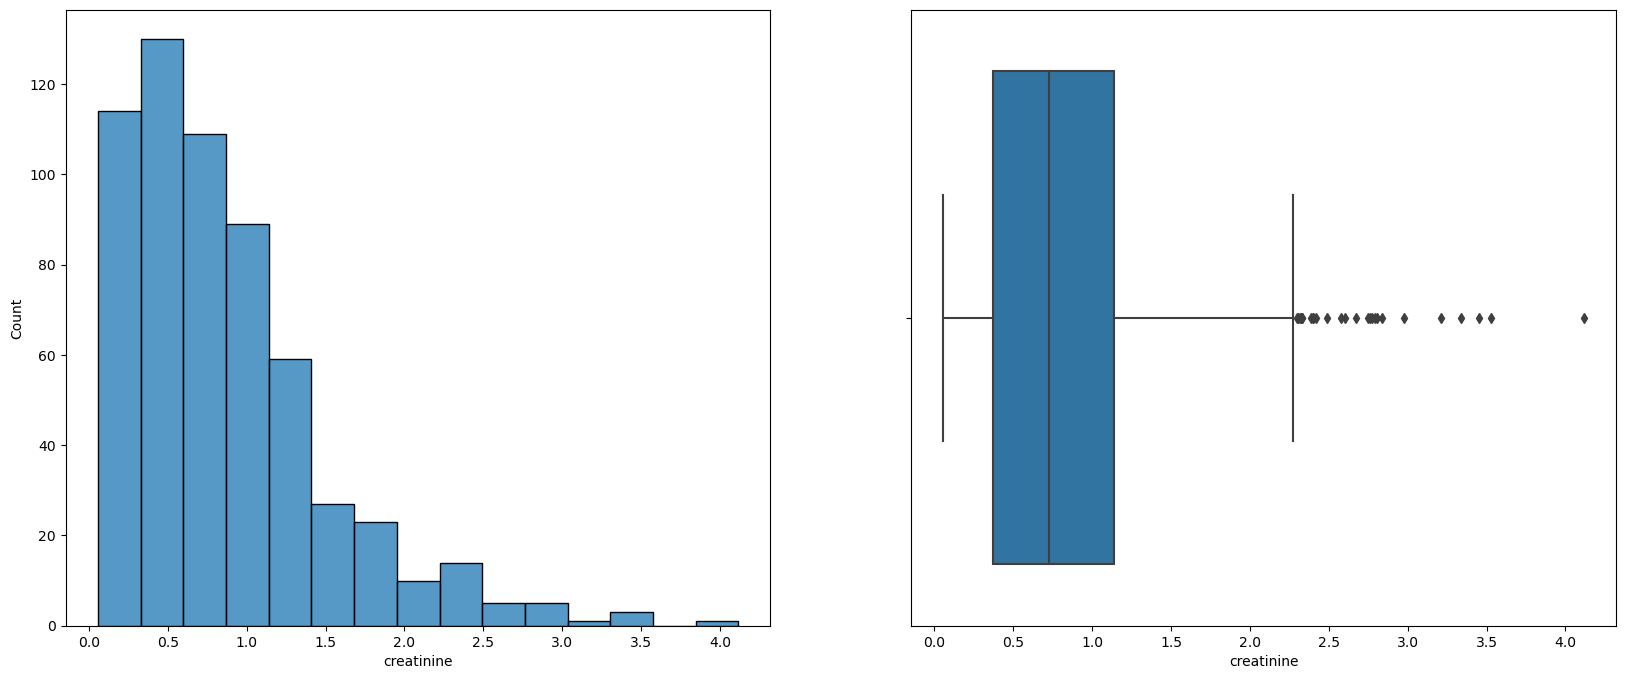

Histogram plot and Box plot:  LYVE1


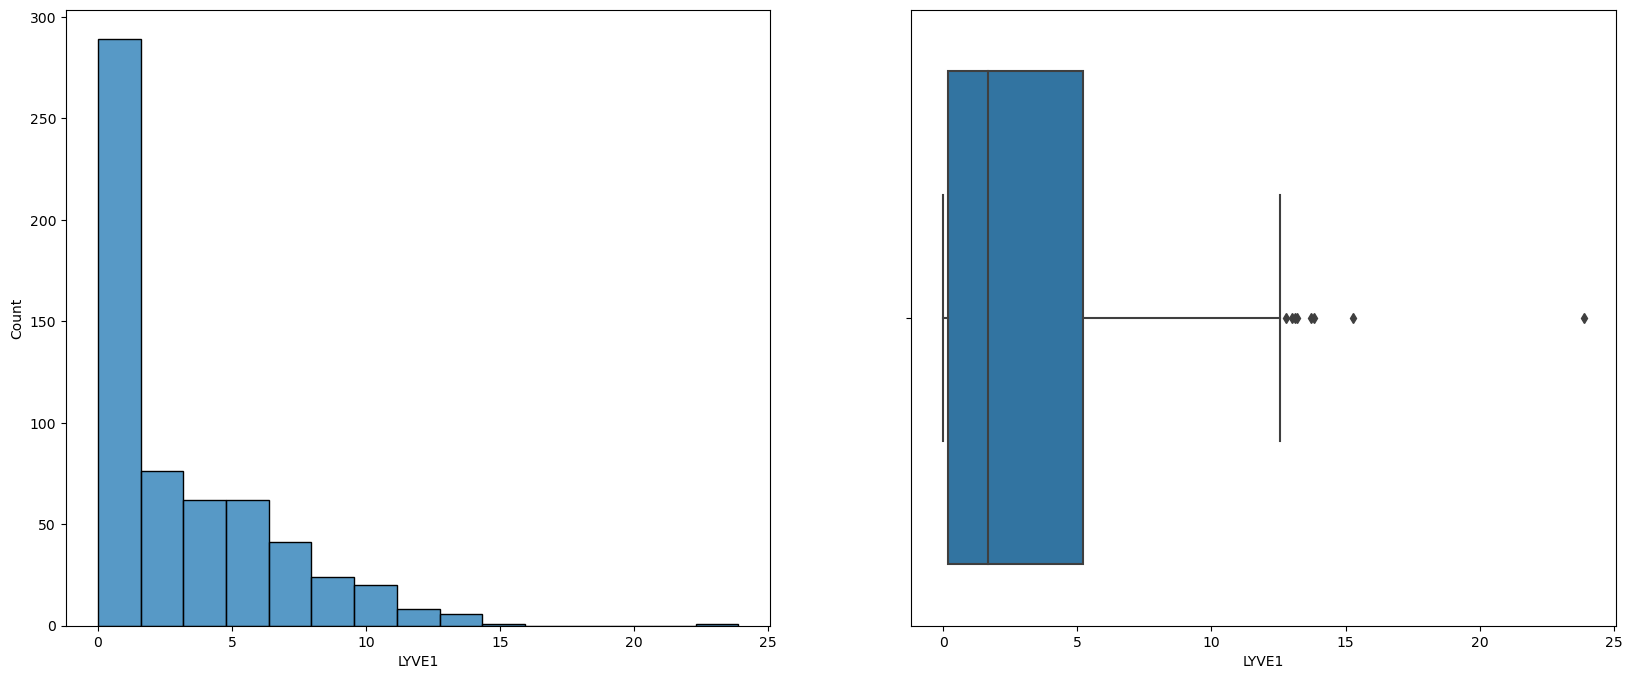

Histogram plot and Box plot:  REG1B


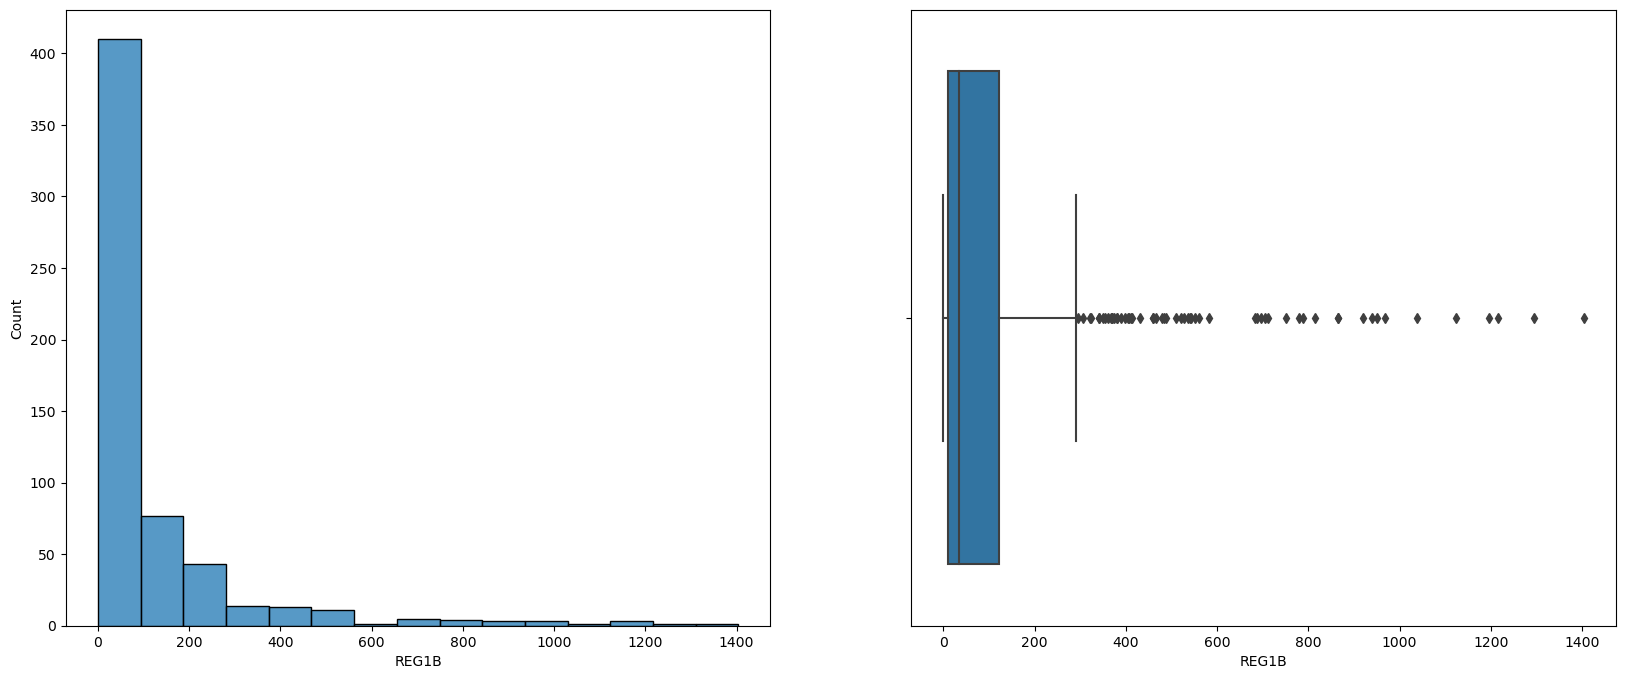

Histogram plot and Box plot:  TFF1


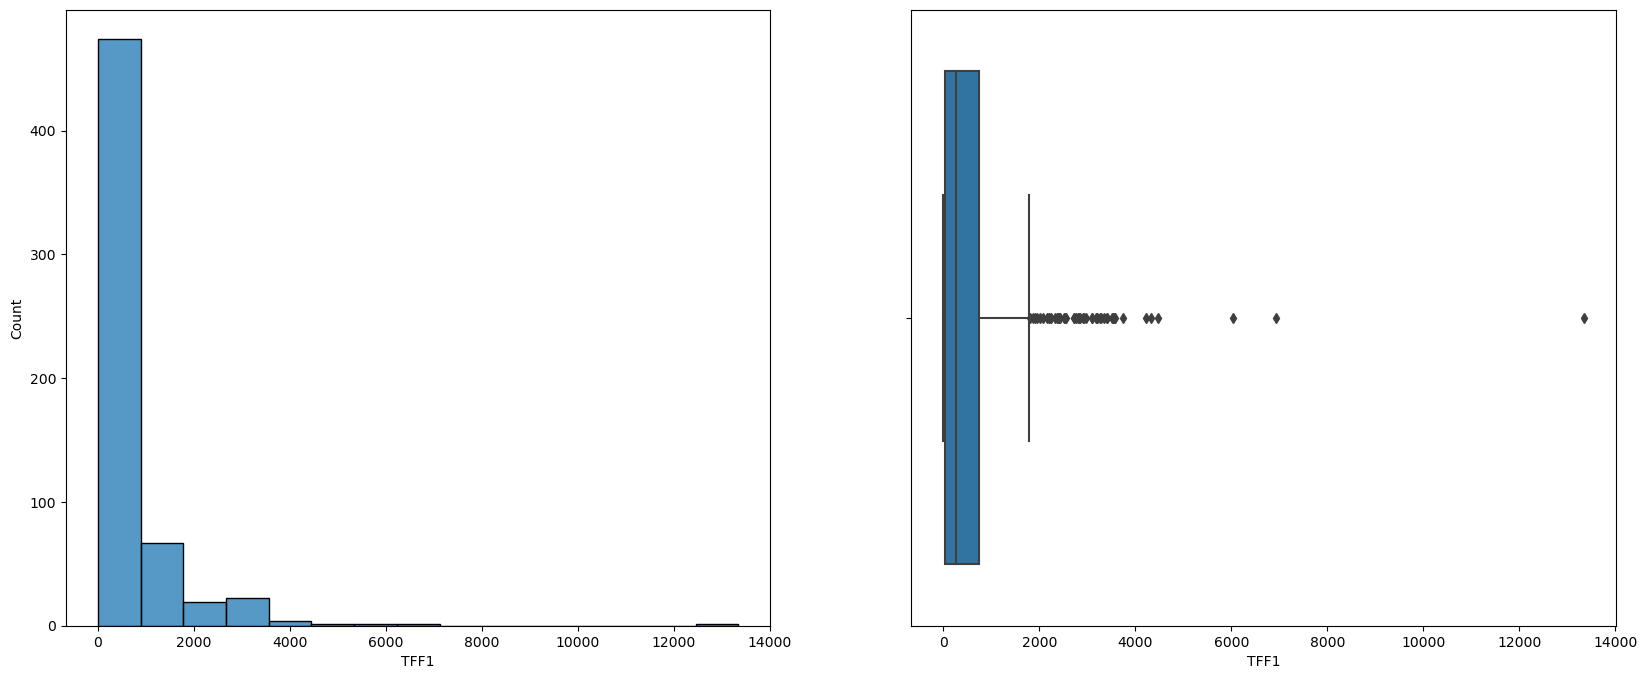

Histogram plot and Box plot:  REG1A


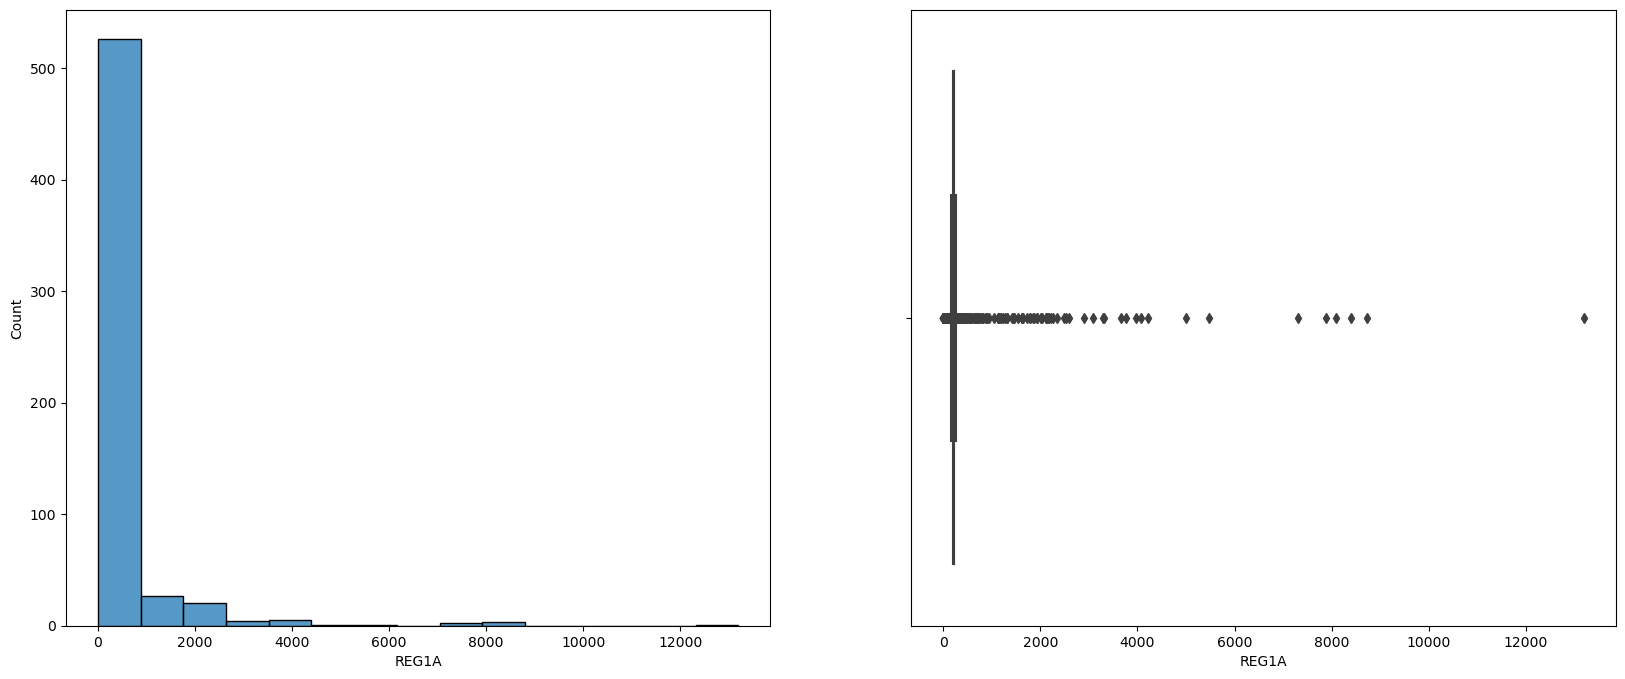

In [74]:
# A for loop to create histogram and boxplot plots for each of the numerical columns
for col in numerical_cols:
    print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.histplot(data[col], ax=ax1, bins = 15)
    sns.boxplot(x = data[col], ax = ax2)
    plt.show()

In [75]:
numerical_cols

['age', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']

In [76]:
data[['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']] = np.log(
    data[['plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']] + 1)

In [77]:
data[numerical_cols].describe()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,3.651298,0.567379,1.054778,3.607996,4.979594,5.378932
std,13.109520,1.778027,0.309551,0.843309,1.574352,2.226808,1.197012
min,26.000000,0.000000,0.055009,0.000129,0.001104,0.005279,0.000000
25%,50.000000,2.890372,0.317166,0.154584,2.464467,3.805664,5.279135
50%,60.000000,3.314186,0.544554,0.974503,3.563973,5.563994,5.344907
75%,69.000000,3.755317,0.760561,1.825361,4.818184,6.611675,5.416119
max,89.000000,10.341775,1.632537,3.214479,7.247720,9.498920,9.488048


Histogram plot and Box plot:  age


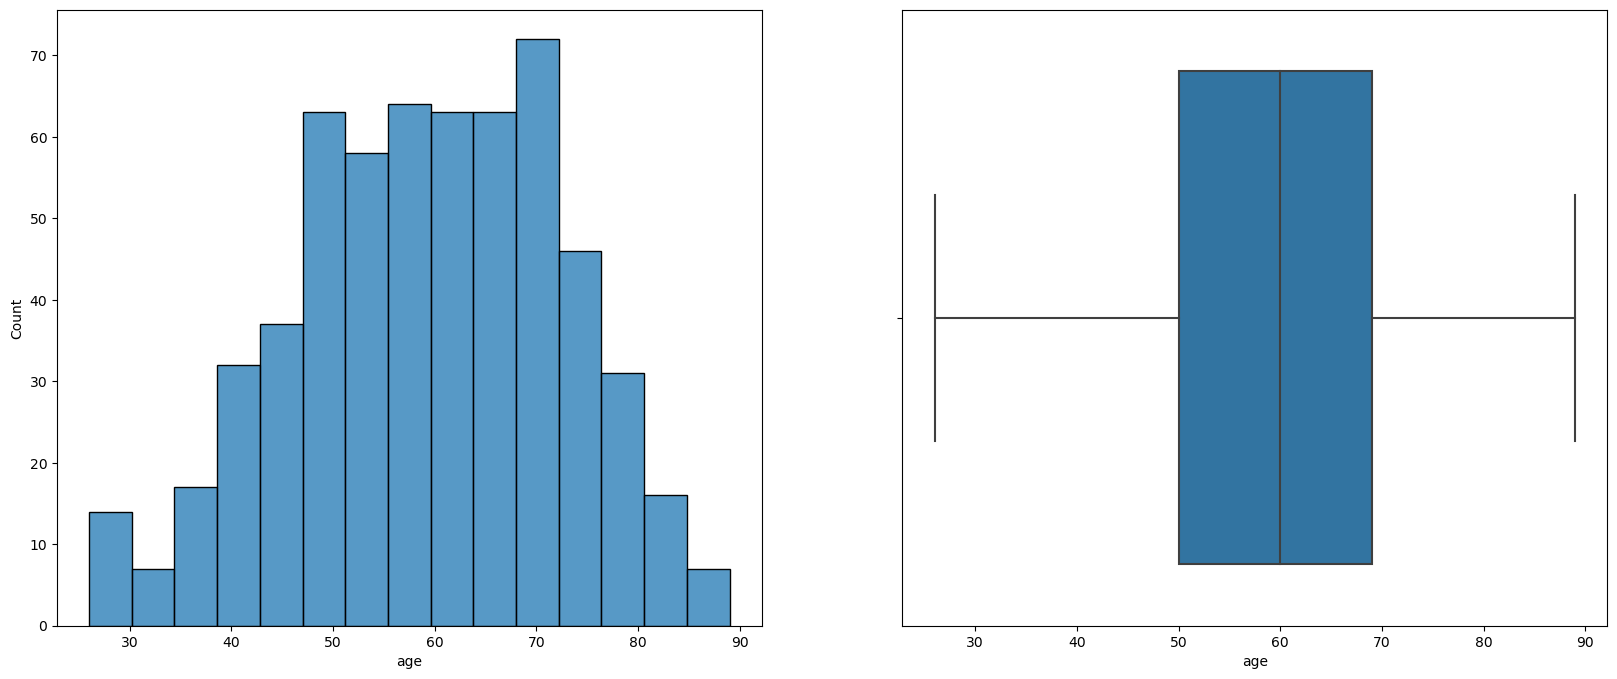

Histogram plot and Box plot:  plasma_CA19_9


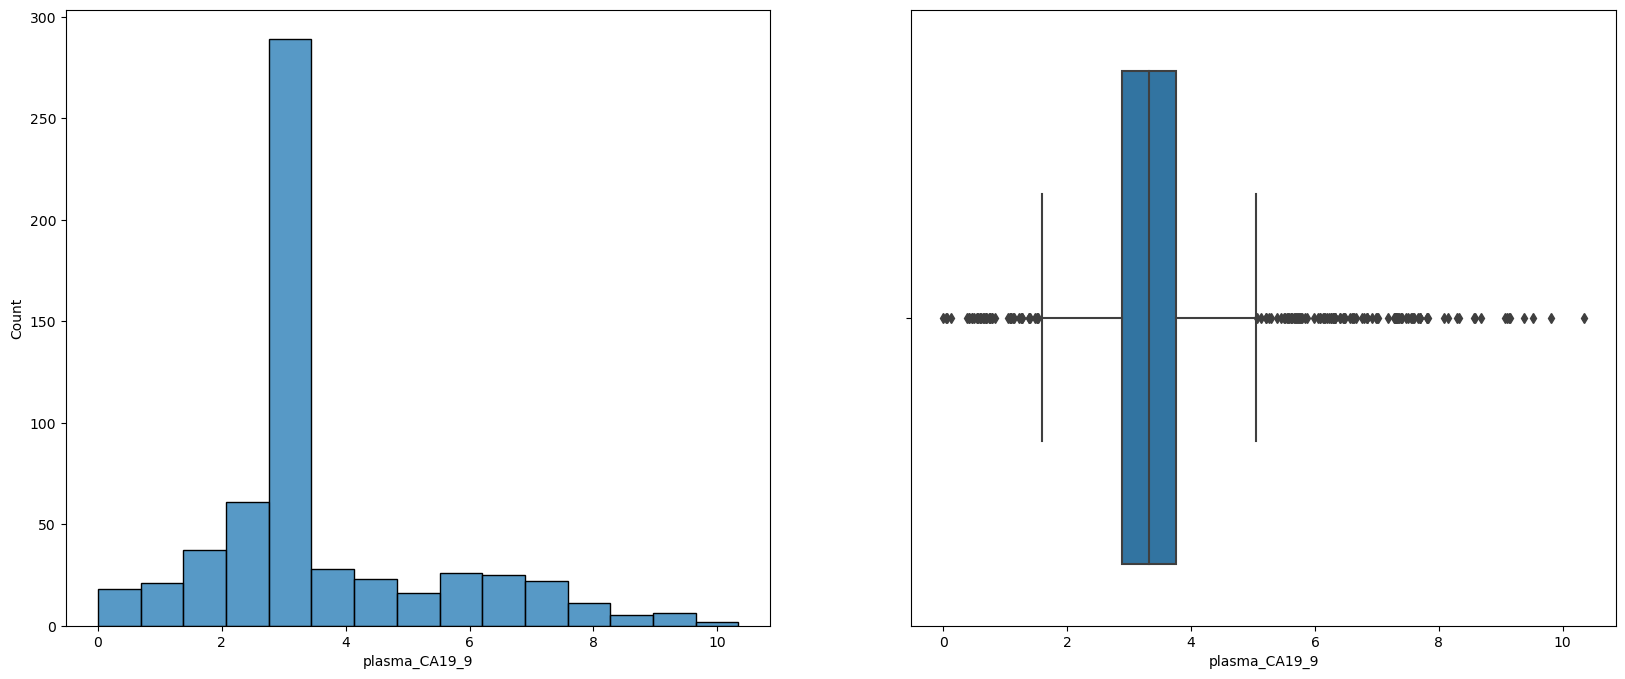

Histogram plot and Box plot:  creatinine


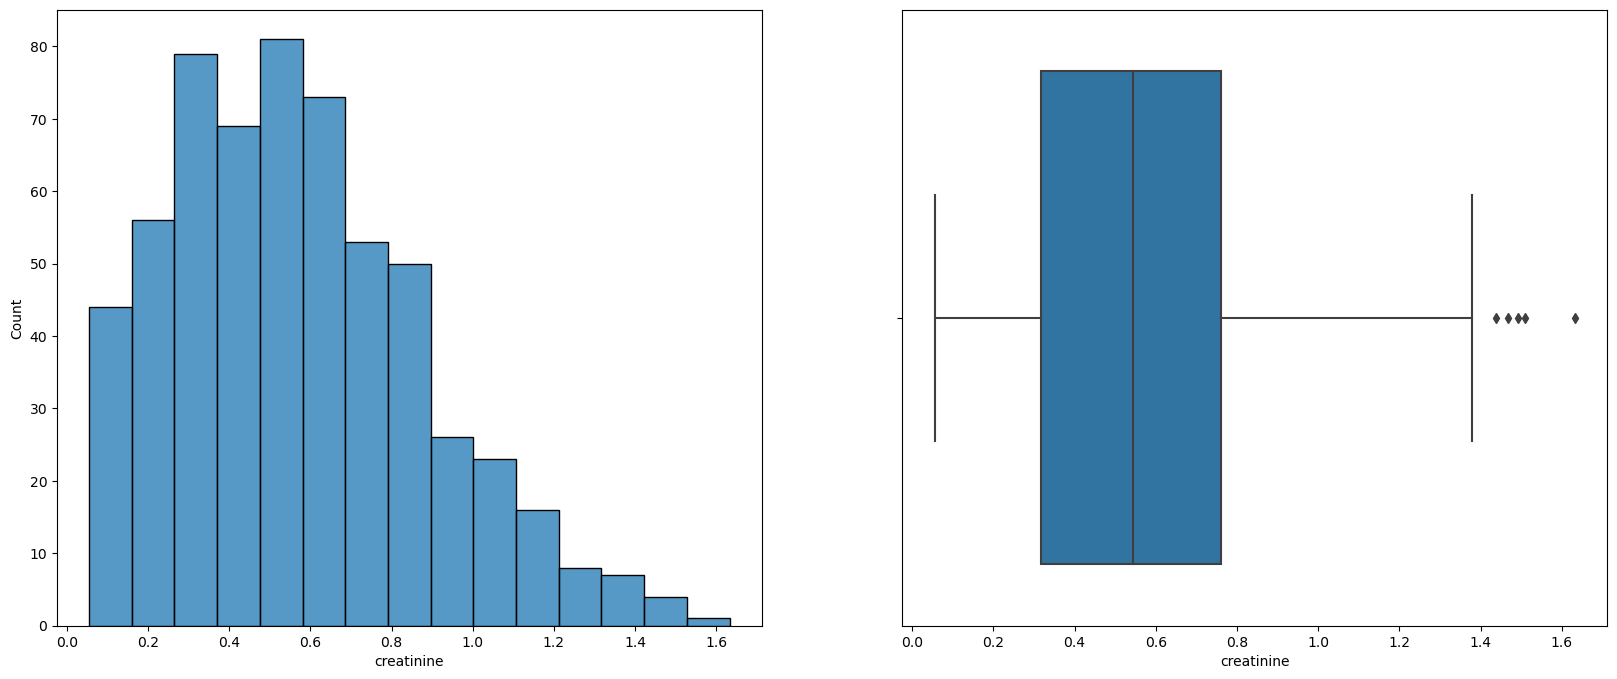

Histogram plot and Box plot:  LYVE1


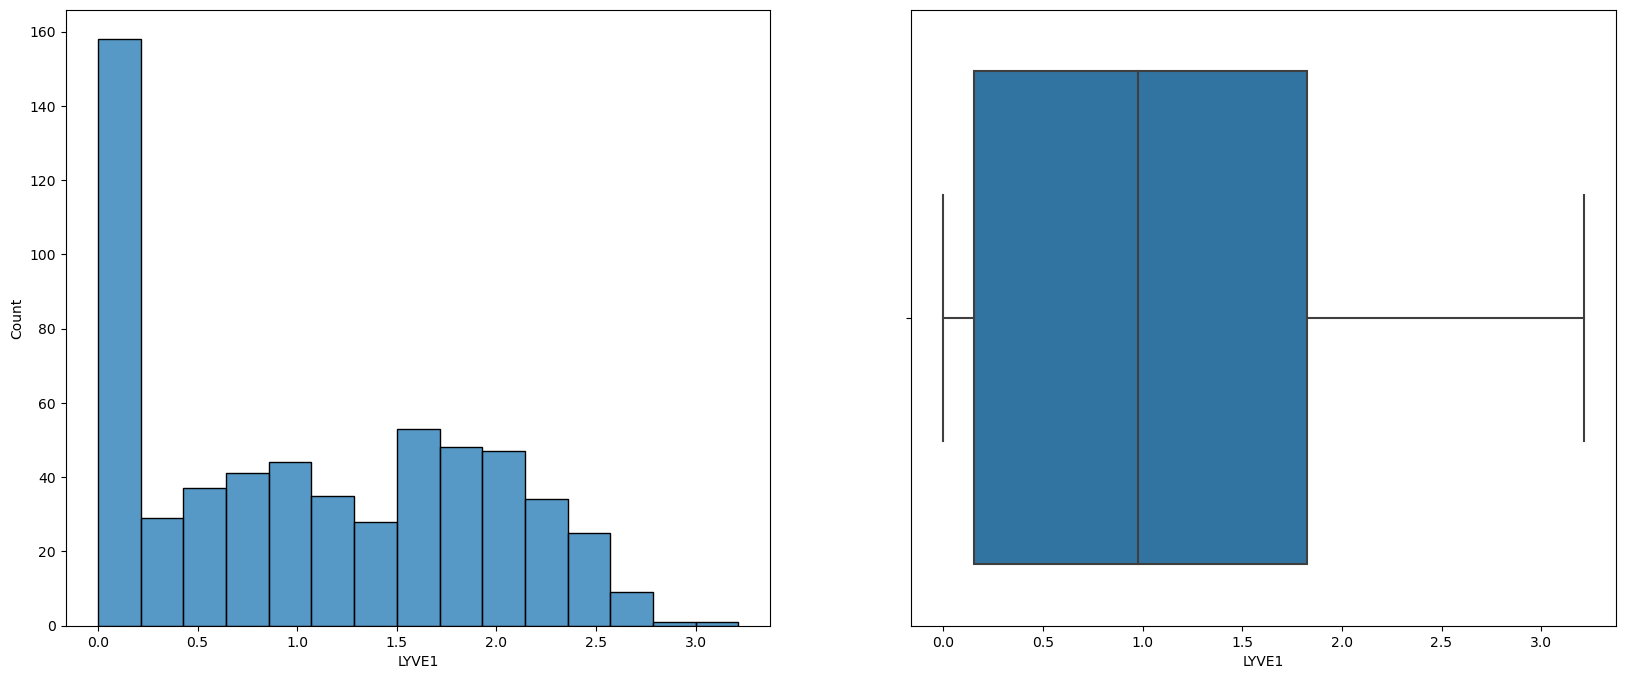

Histogram plot and Box plot:  REG1B


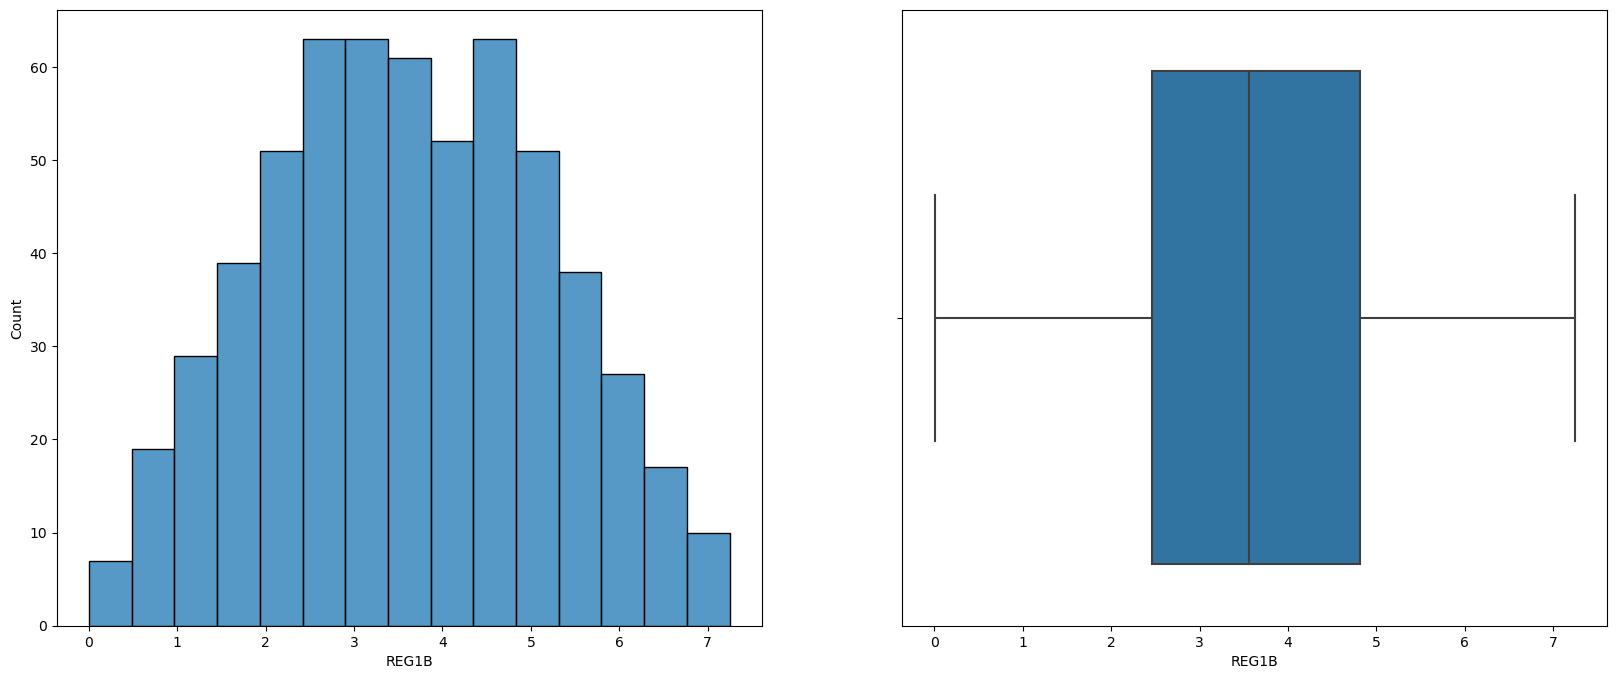

Histogram plot and Box plot:  TFF1


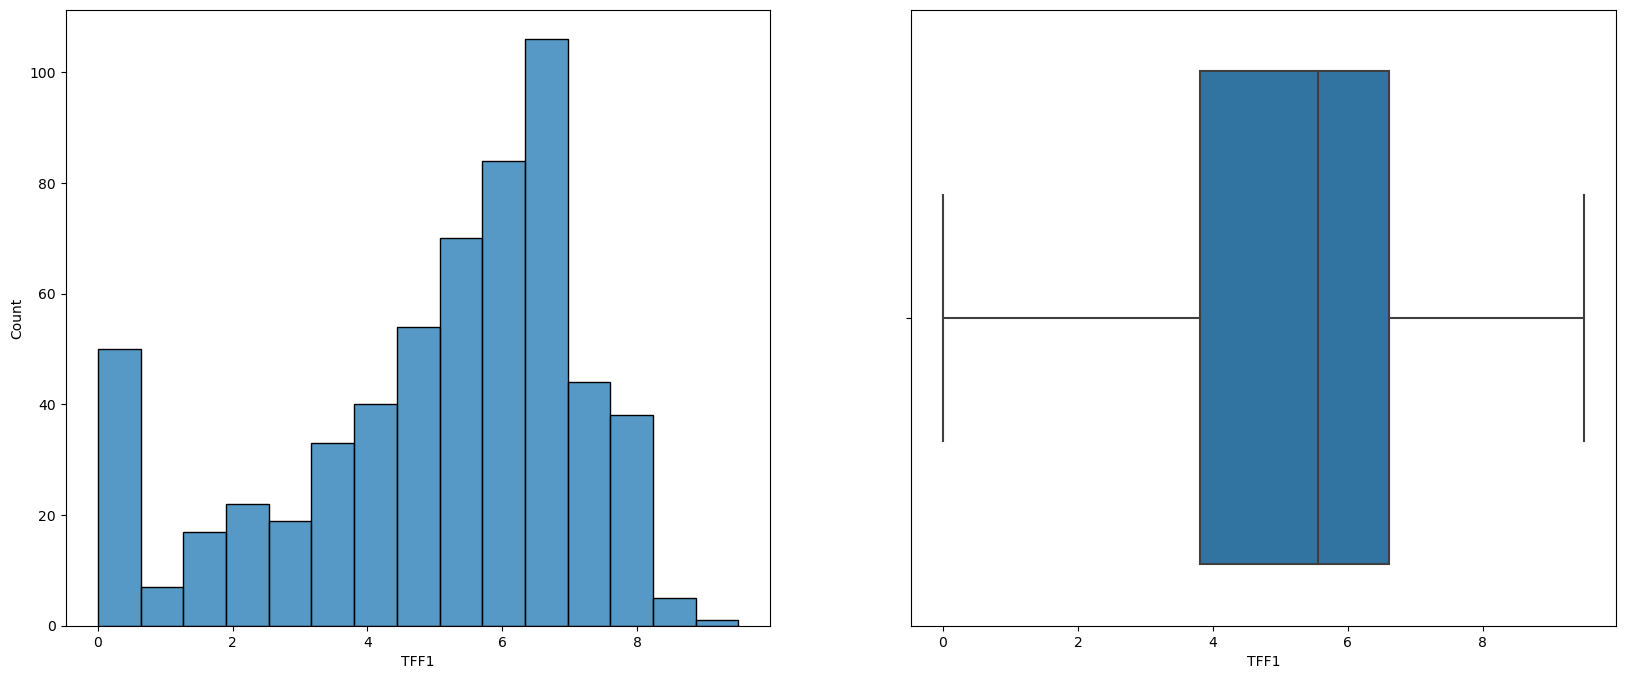

Histogram plot and Box plot:  REG1A


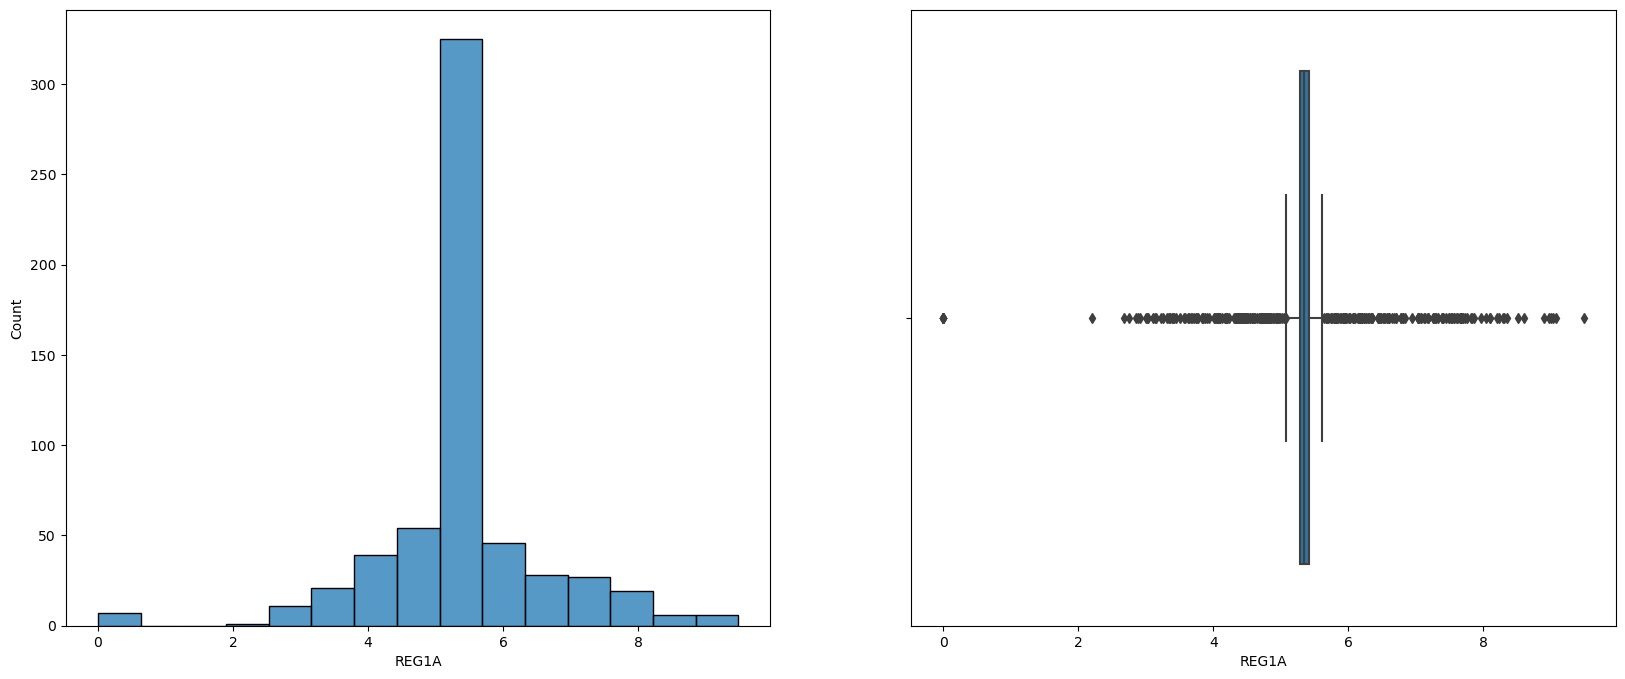

In [78]:
# A for loop to create histogram and boxplot plots for each of the numerical columns
for col in numerical_cols:
    print("Histogram plot and Box plot: ", col)
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    sns.histplot(data[col], ax=ax1, bins = 15)
    sns.boxplot(x = data[col], ax = ax2)
    plt.show()

In [79]:
data.sample(10)

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
260,42,2,3.314186,0.185300,0.812778,2.967191,4.587082,4.577439,0,1
64,55,1,0.559561,0.373217,0.000647,2.061269,0.499046,5.344907,1,0
70,64,1,0.376471,0.117258,0.000498,2.019332,0.009657,5.344907,1,0
164,55,1,3.314186,0.185300,0.000814,1.238374,1.972969,5.344907,1,1
237,63,2,3.314186,0.620948,0.608192,0.714077,4.902436,3.230370,0,1
522,70,3,7.656810,0.940312,1.995831,6.670877,8.074520,8.204992,0,1
330,54,2,2.054124,0.313866,0.471308,3.519503,5.511151,5.092799,0,0
346,82,2,3.314186,0.210356,0.114822,0.726845,0.018096,3.012589,0,1
495,55,3,5.204007,0.411414,1.171205,3.225804,5.877229,4.426653,0,1
263,50,2,3.314186,0.175859,0.794549,4.745285,6.750605,5.798538,0,0


In [80]:
data.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,2.027119,3.651298,0.567379,1.054778,3.607996,4.979594,5.378932,0.437288,0.493220
std,13.109520,0.804873,1.778027,0.309551,0.843309,1.574352,2.226808,1.197012,0.496473,0.500378
min,26.000000,1.000000,0.000000,0.055009,0.000129,0.001104,0.005279,0.000000,0.000000,0.000000
25%,50.000000,1.000000,2.890372,0.317166,0.154584,2.464467,3.805664,5.279135,0.000000,0.000000
50%,60.000000,2.000000,3.314186,0.544554,0.974503,3.563973,5.563994,5.344907,0.000000,0.000000
75%,69.000000,3.000000,3.755317,0.760561,1.825361,4.818184,6.611675,5.416119,1.000000,1.000000
max,89.000000,3.000000,10.341775,1.632537,3.214479,7.247720,9.498920,9.488048,1.000000,1.000000


## Machine Learning Modelling

Multiclass classification to Binary Classification

In [81]:
# The negative class (benign cancer)
data.diagnosis.replace(to_replace=[1,2], value=0, inplace=True)
# The positive class (malignant cancer)
data.diagnosis.replace(to_replace=3, value=1, inplace=True)

In [82]:
features = data.drop("diagnosis", axis = 1) 
target = data.diagnosis

In [83]:
features

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
0,33,2.541602,1.041061,0.638279,3.988036,6.485066,7.141245,0,0
1,81,3.314186,0.679383,1.111063,4.558781,5.349430,5.435498,0,0
2,51,2.079442,0.576832,0.135919,4.638276,6.135870,5.344907,1,1
3,61,2.197225,0.531346,0.002801,4.120321,4.969466,5.344907,1,1
4,62,2.302585,0.194654,0.000859,4.197803,3.739763,5.344907,1,1
...,...,...,...,...,...,...,...,...,...
585,68,3.314186,0.418881,2.086691,5.057780,6.265640,5.344907,1,1
586,71,3.314186,0.620340,2.234435,2.885638,5.509174,5.344907,1,0
587,63,3.314186,0.862261,2.160412,5.672295,6.288390,5.344907,1,1
588,75,3.314186,0.847832,2.219940,5.332381,6.584132,5.344907,1,0


In [84]:
features.describe()

,age,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,patient_cohort_1?,is_male?
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,59.079661,3.651298,0.567379,1.054778,3.607996,4.979594,5.378932,0.437288,0.493220
std,13.109520,1.778027,0.309551,0.843309,1.574352,2.226808,1.197012,0.496473,0.500378
min,26.000000,0.000000,0.055009,0.000129,0.001104,0.005279,0.000000,0.000000,0.000000
25%,50.000000,2.890372,0.317166,0.154584,2.464467,3.805664,5.279135,0.000000,0.000000
50%,60.000000,3.314186,0.544554,0.974503,3.563973,5.563994,5.344907,0.000000,0.000000
75%,69.000000,3.755317,0.760561,1.825361,4.818184,6.611675,5.416119,1.000000,1.000000
max,89.000000,10.341775,1.632537,3.214479,7.247720,9.498920,9.488048,1.000000,1.000000


In [85]:
target

0      0
1      0
2      0
3      0
4      0
      ..
585    1
586    1
587    1
588    1
589    1
Name: diagnosis, Length: 590, dtype: int64

In [86]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=42)

#### Logistic Regression

In [87]:
mdl_LR = LogisticRegression(max_iter=30000)

In [88]:
mdl_LR.fit(X_train, y_train)

LogisticRegression(max_iter=30000)

In [89]:
y_pred_LR = mdl_LR.predict(X_test)

In [90]:
# y_pred_LR

In [91]:
accuracy_score(y_test, y_pred_LR)

0.9096045197740112

<AxesSubplot:>

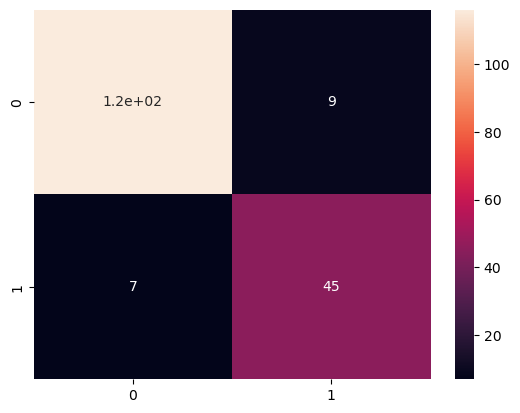

In [92]:
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot = True)

In [93]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       125
           1       0.83      0.87      0.85        52

    accuracy                           0.91       177
   macro avg       0.89      0.90      0.89       177
weighted avg       0.91      0.91      0.91       177



#### Decision Tree

In [94]:
mdl_DT = DecisionTreeClassifier()

In [95]:
mdl_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
y_pred_DT = mdl_DT.predict(X_test)
# y_pred_DT

In [97]:
accuracy_score(y_test, y_pred_DT)

0.8418079096045198

<AxesSubplot:>

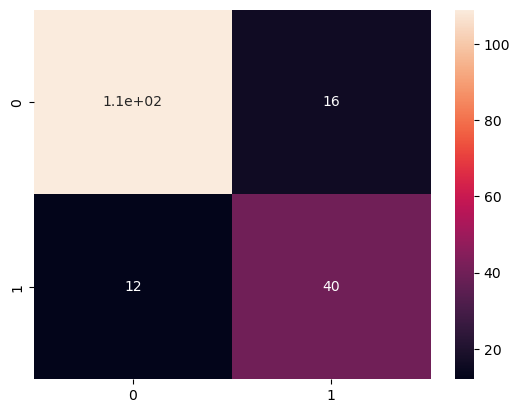

In [98]:
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot = True)

In [99]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       125
           1       0.71      0.77      0.74        52

    accuracy                           0.84       177
   macro avg       0.81      0.82      0.81       177
weighted avg       0.85      0.84      0.84       177



### Random forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
model_rf = RandomForestClassifier(n_estimators=1000, random_state=42)

In [117]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [118]:
y_pred = model_rf.predict(X_test)
# y_pred

In [119]:
accuracy_score(y_test, y_pred)

0.9265536723163842